<a href="https://colab.research.google.com/github/Phengou/Filter_image-proccessing-/blob/main/project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: CHEA PHENG OU
ID : 6672054521

In [5]:
import pandas as pd
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Mean Absolute Error (MAE):** This metric measures the average absolute difference between the predicted values and the actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values. MAE is less sensitive to outliers compared to RMSE.
**Root Mean Square Error (RMSE):** This metric measures the square root of the average of the squared differences between the predicted values and the actual values. RMSE gives higher weight to large errors compared to MAE because of the squaring operation, making it sensitive to outliers.

In [7]:
import matplotlib.pyplot as plt
# Read the CSV file into a pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/Chula Assignment/IOT/Temp.csv")

# Prepare data
x = []
y = data["Temperature"][5:]
for i in range(5, len(data)):
    x.append(list(data["Temperature"][i-5:i]))

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Train SVR model
model = SVR(kernel='linear')
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))

MAE: 0.1387
RMSE: 0.2405


*   Use SVM to predict the next temperature from the previous five measurements.
*   With  8:2  of the train/test split, evaluate your model in terms of MAE and RMSE.

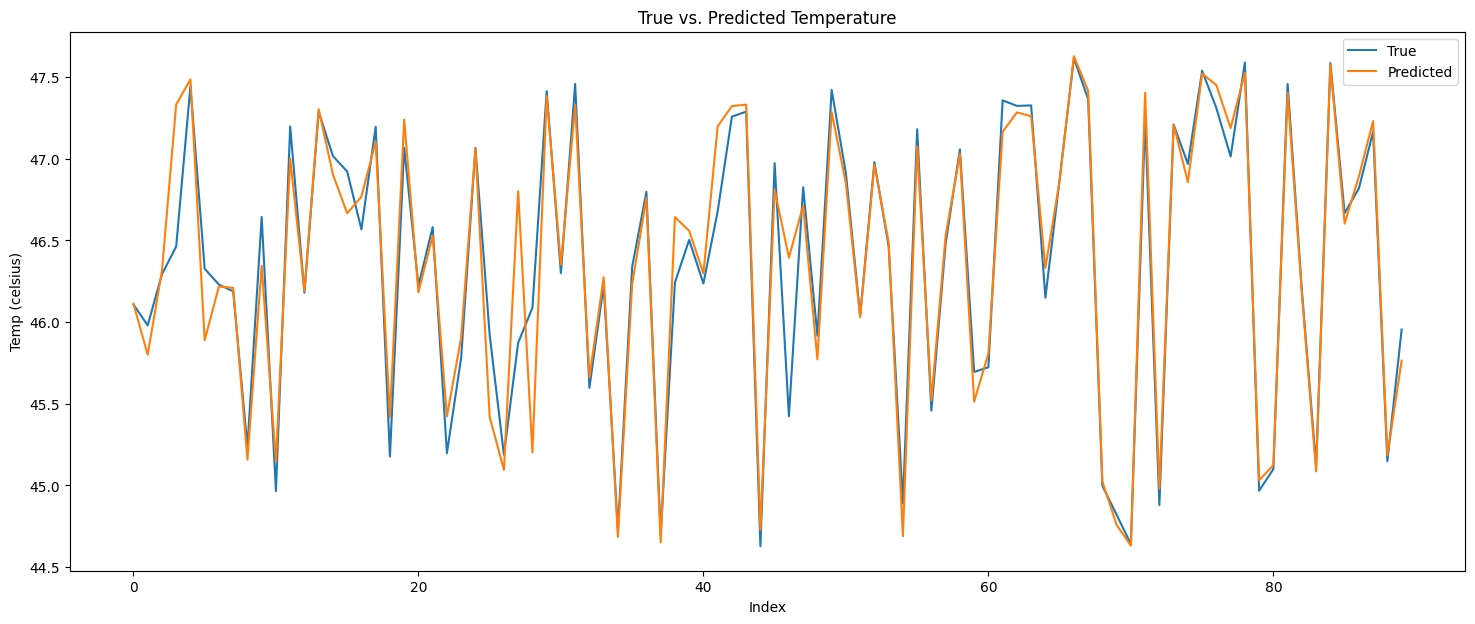

In [8]:
# Plot true vs. predicted values
true_pred = pd.DataFrame(data={"True": y_test.reset_index(drop=True), "Predict": y_pred})
plt.figure(figsize=(18, 7))
plt.plot(true_pred["True"], label="True")
plt.plot(true_pred["Predict"], label="Predicted")
plt.xlabel("Index")
plt.ylabel("Temp (celsius)")
plt.legend()
plt.title("True vs. Predicted Temperature")
plt.show()